In [1]:
%matplotlib tk
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import glob, os
import io
import seaborn as sns
import matplotlib.ticker as plticker
warnings.simplefilter("ignore")
from matplotlib.legend import _get_legend_handles_labels

In [2]:
#RELAX ROUND 100,000 steps - vor all clusters and all expansion lengths the same

In [3]:
filename = list()
framecluster0_relax=list()
framecluster0_relaxconstraint=list()

for n in range (10):
    n= str(n+1)
    filename1=str("5000/cluster0/0/"+n+"/CopStemsc0_expand_long03_0_"+n+".csv")
    dfname1=str("dfcluster0round0nr"+n+"_relax")
    globals()[dfname1]= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,3)])
    framecluster0_relax.append(globals()[dfname1])
                                         
    filename2=str("5000/cluster0/0/"+n+"/CopStemsc0_expand_long03_0.constraint-csv")
    dfname2=str("dfcluster0round0nr"+n+"_constraint")
    globals()[dfname2]= pd.read_csv(filename2, sep="\t")
    framecluster0_relaxconstraint.append(globals()[dfname2])

dfcluster0_relax=pd.concat(framecluster0_relax)
print(len(dfcluster0_relax))

#framescluster0_relax = [df101_expand,df102_expand,df103_expand]

#df1_expand = pd.concat(frames1_expand)

#dfint1_expand = pd.read_csv('ernwin-simrna-new_output/CopStems_expand_1.csv',sep="\t")
#dfint1_expand_best = pd.read_csv('ernwin-simrna-new_output/CopStems_expand_1.interaction-csv',sep="\t")


10010


SINGLE RUNS - Relaxed Run 100.000steps
start structure (3) --> contraint (3)
           energy  bps               intsel
0     -678.118198  3.0  interaction_countbp
1     -998.854130  3.0  interaction_countbp
2    -1034.483868  3.0  interaction_countbp
3    -1039.746681  3.0  interaction_countbp
4    -1040.894023  3.0  interaction_countbp
...           ...  ...                  ...
996  -1238.511053  4.0  interaction_countbp
997  -1268.847485  3.0  interaction_countbp
998  -1242.715062  4.0  interaction_countbp
999  -1216.855173  4.0  interaction_countbp
1000 -1205.666784  4.0  interaction_countbp

[1001 rows x 3 columns]
-1145.812074 2
           energy  bps               intsel
0     -678.118198  3.0  interaction_countbp
1     -990.982368  2.0  interaction_countbp
2     -993.244555  4.0  interaction_countbp
3    -1036.608282  4.0  interaction_countbp
4    -1048.322380  4.0  interaction_countbp
...           ...  ...                  ...
996  -1257.686025  5.0  interaction_countbp
997

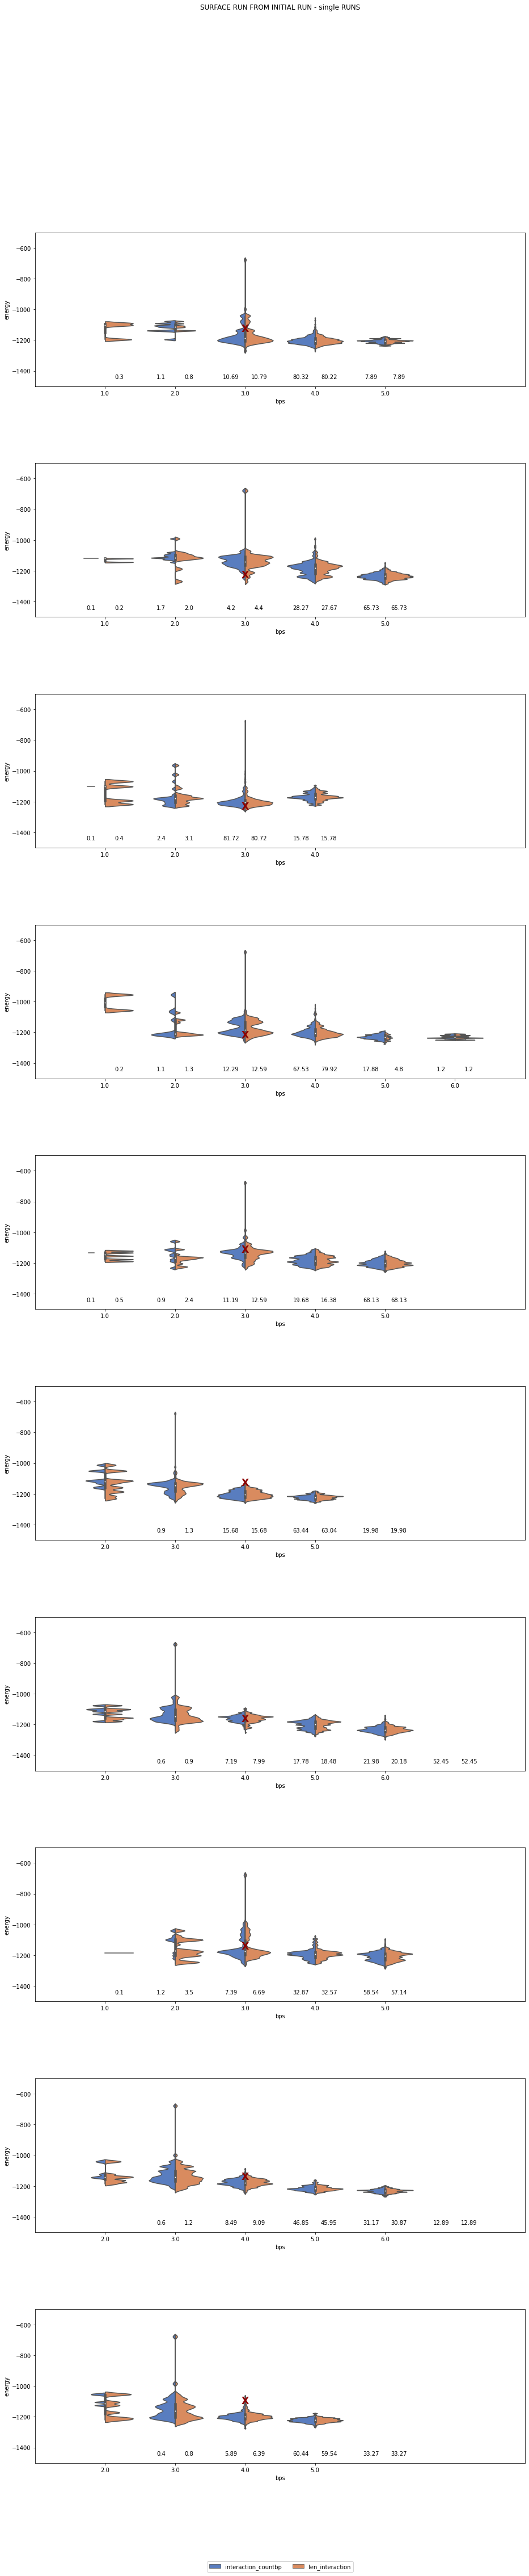

<Figure size 432x288 with 0 Axes>

In [5]:
print('SINGLE RUNS - Relaxed Run 100.000steps')
print('start structure (3) --> contraint (3)')
majortitle=str('SURFACE RUN FROM INITIAL RUN - single RUNS')


fig, ax = plt.subplots(nrows=10,figsize=[15,70])#,figsize=[80,60]
fig.subplots_adjust(hspace=0.5, wspace=0.2,top=0.9, left=0.1, right=0.9, bottom=0.12 )

xval= ['interaction_countbp','len_interaction']
yval = str('energy_value')
fig.suptitle(majortitle)


for ndf, df in enumerate(framecluster0_relax):
    #prepare the dataframes
    new1_df = pd.DataFrame([df.energy_value, df.interaction_countbp]).transpose()
    new1_df.columns = ['energy', 'bps']
    new1_df['intsel'] = xval[0]
    print (new1_df)

    new2_df = pd.DataFrame([df.energy_value, df.len_interaction]).transpose()
    new2_df.columns = ['energy', 'bps']
    new2_df['intsel'] = xval[1]
    
    newframes = [new1_df, new2_df]
    new_df = pd.concat(newframes,ignore_index=True)
    
    values1=pd.DataFrame(new1_df.bps.value_counts().sort_values().reset_index())
    values1.columns = ['bpsint', 'nr']
    values1['percent'] = (values1.nr /values1.nr.sum())*100
    
    values2=pd.DataFrame(new2_df.bps.value_counts().sort_values().reset_index())
    values2.columns = ['bpsint', 'nr']
    values2['percent'] = (values2.nr /values2.nr.sum())*100
    
    #Scale the violin width by the number of observations in each bin (scale=count):
    axname = str('ax'+str(ndf+1))  

    
    axname = sns.violinplot(x="bps", y="energy", hue="intsel", data=new_df,
                            palette="muted", split=True, scale="count",  ax=ax[ndf], bw=0.1)
    
    '''
    bw{‘scott’, ‘silverman’, float}, optional
    Either the name of a reference rule or the scale factor to use when computing the kernel bandwidth. 
    The actual kernel size will be determined by multiplying the scale factor by the standard deviation 
    of the data within each bin.
    '''
    axname.get_legend().remove()   
    axname.set_xlim([-1.0, 6.0],auto=False,)
    axname.set_ylim([-1500,-500],auto=False,)
    
    #plot the percentages of each interaction length
    for index, row in values1.iterrows():
        axname.text(row.bpsint-1.2, -1450, round(row.percent,2), color='black', ha="center")
        
    for index, row in values2.iterrows():
        axname.text(row.bpsint-0.8, -1450, round(row.percent,2), color='black', ha="center")
    
    current_energy= framecluster0_relaxconstraint[ndf]['energy_value'].iloc[0]
    current_bp=(framecluster0_relaxconstraint[ndf]['len_interaction'].iloc[0])-1
    
    print (current_energy, current_bp)
    
    axname.text(current_bp,current_energy,
                "X", color='darkred', ha="center",fontweight= "black",fontsize = 'xx-large')  
    
    '''
    #Histogram for number of interaction length observations - if used change nrows to 20
    axname1 = str('ax'+str(n+1)+str(n+1))   
    axname1 =  sns.histplot(data=new_df, x="bps", hue="intsel", multiple="dodge", shrink=0.5, ax=ax[n+10],
                            bins=range(0, 7, 1),discrete = True) 
    axname1.get_legend().remove()
    for index, row in values1.iterrows():
        axname1.text(row.bpsint,row.nr, round(row.percent,1), color='black', ha="center")   
    '''
ax.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -2.12), ncol=3)

fig.tight_layout()
plt.show()
plt.savefig('CopStems_relax_1.svg')




CLUSTER 0 - RELAXED RUN all together
start structure (3) --> contraint (5)
                                                 number  \
0     CopStemsc0_expand_long03_0_1_1-000001.ss_detected   
1     CopStemsc0_expand_long03_0_1_1-000002.ss_detected   
2     CopStemsc0_expand_long03_0_1_1-000003.ss_detected   
3     CopStemsc0_expand_long03_0_1_1-000004.ss_detected   
4     CopStemsc0_expand_long03_0_1_1-000005.ss_detected   
...                                                 ...   
996   CopStemsc0_expand_long03_0_10_10-000997.ss_det...   
997   CopStemsc0_expand_long03_0_10_10-000998.ss_det...   
998   CopStemsc0_expand_long03_0_10_10-000999.ss_det...   
999   CopStemsc0_expand_long03_0_10_10-001000.ss_det...   
1000  CopStemsc0_expand_long03_0_10_10-001001.ss_det...   

                                               sequence  count_constraint  \
0      .(.(((((.((((((((((..(((......))).))).)))))))...                 7   
1      ((((((((((((((((((.(.(((......)))).)).)))))))...       

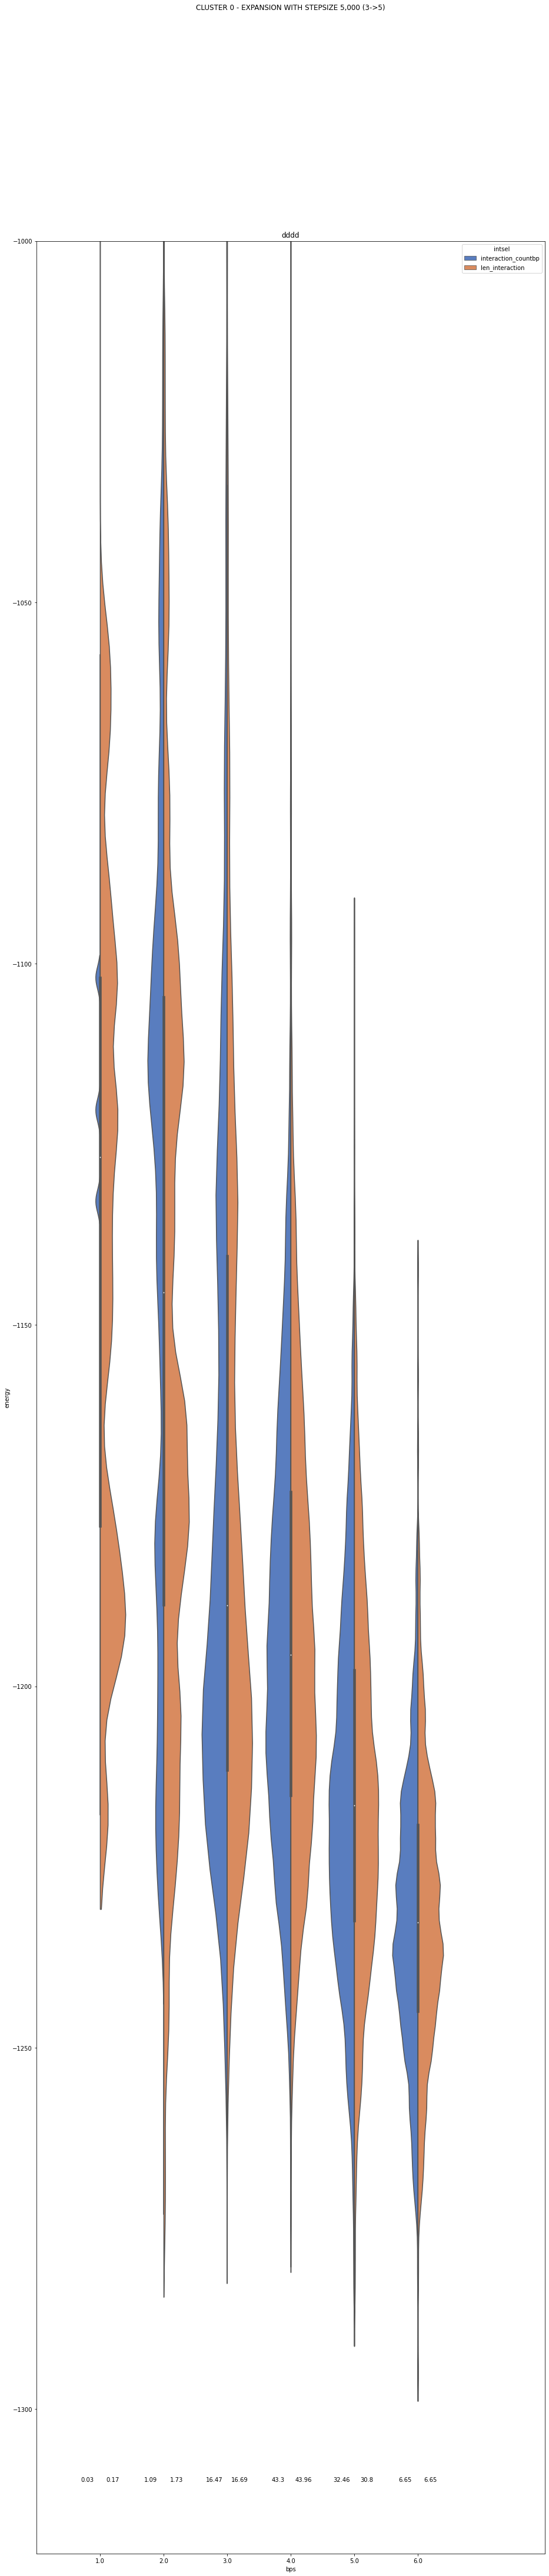

<Figure size 432x288 with 0 Axes>

In [6]:
print('CLUSTER 0 - RELAXED RUN all together')
print('start structure (3) --> contraint (5)')
majortitle=str('CLUSTER 0 - EXPANSION WITH STEPSIZE 5,000 (3->5)')

fig, ax = plt.subplots(figsize=[15,70])#,figsize=[80,60]
fig.subplots_adjust(hspace=0.5, wspace=0.2,top=0.9, left=0.1, right=0.9, bottom=0.12 )

xval= ['interaction_countbp','len_interaction']
yval = str('energy_value')
fig.suptitle(majortitle)
#ax.set_autoscale_on(False)

df = dfcluster0_relax
print(df)
#prepare the dataframes
df.reset_index(inplace=True, drop=True)
new1_df = pd.DataFrame([df.energy_value, df.interaction_countbp]).transpose()
new1_df.columns = ['energy', 'bps']
new1_df['intsel'] = xval[0]

new2_df = pd.DataFrame([df.energy_value, df.len_interaction]).transpose()
new2_df.columns = ['energy', 'bps']
new2_df['intsel'] = xval[1]

newframes = [new1_df, new2_df]
new_df = pd.concat(newframes,ignore_index=True)
print(new_df)

values1=pd.DataFrame(new1_df.bps.value_counts().sort_values().reset_index())
values1.columns = ['bpsint', 'nr']
values1['percent'] = (values1.nr /values1.nr.sum())*100
print(values1)

values2=pd.DataFrame(new2_df.bps.value_counts().sort_values().reset_index())
values2.columns = ['bpsint', 'nr']
values2['percent'] = (values2.nr /values2.nr.sum())*100
print(values2)

#Scale the violin width by the number of observations in each bin (scale=count):
ax = sns.violinplot(x="bps", y="energy", hue="intsel", data=new_df,
                        palette="muted", split=True, scale="count", bw=0.1)

#ax.get_legend().remove()
ax.set_xlim([-1.0, 7.0])
ax.set_ylim([-1320,-1000])

#plot the percentages of each interaction length
for index, row in values1.iterrows():
    ax.text(row.bpsint-1.2, -1310, round(row.percent,2), color='black', ha="center")

for index, row in values2.iterrows():
    ax.text(row.bpsint-0.8, -1310, round(row.percent,2), color='black', ha="center")

ax.title.set_text('dddd')

#ax.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -2.12), ncol=3)

#fig.tight_layout()
plt.show()
plt.savefig('CopStems_cluster0_step5000.svg')


In [ ]:
#EXPANSION RUNS - CLUSTER 0

In [ ]:
# STEPSIZE 5.000

In [9]:
filename = list()
fclust_seed=list()
fclust_pdb=list()
fclust_run=list()
fclust_sumintperpdb=list()
fclust_sumintperrun=list()
stepsize="expand_long00"
subplotsname= list()
controllist_sumintperpdb=list()
controllist_sumintperrun=list()
controllist_seed=list()
controllist_pdb=list()
controllist_run=list()

for runs in range (4): # could be also lower/higher - if for one is no expansion possible
    run=str(runs+1)
    dfname1_sum=str("dfcluster0round"+run+"sum")        
    subplotsname.append(dfname1_sum)
   
    for n in range(10): #10 different pdbs as starting points
        n=str(n+1)
        filename2=str("5000/cluster0/"+run+"/"+n+"/CopStemsc0_"+stepsize+"_"+run+".interaction-csv")
        dfname2=str("dfcluster0round"+run+"nr"+n+"_interaction")

        try:
            globals()[dfname2]= pd.read_csv(filename2, sep="\t")
            fclust_sumintperpdb.append(globals()[dfname2])
            controllist_sumintperpdb.append(filename2)
        except:
            print("Probably there were no further expansion possible - please check")
            print(filename2) 
            pass
        
        for seed in range (10): #10 different seeds per pdb
            seed= str(seed+1)
            filename1=str("5000/cluster0/"+run+"/"+n+"/CopStemsc0_"+stepsize+"_"+run+"_"+seed+".csv")
            dfname1=str("dfcluster0round"+run+"nr"+seed+"_long00")

            try:
                globals()[dfname1]= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,3)])
                fclust_seed.append(globals()[dfname1])
                controllist_seed.append(filename1)
            except:
                #print("Probably there were no further expansion possible - please check")
                #print(filename1)
                pass
 
        try:
            df_seed= pd.concat(fclust_seed) #concat 10 seeds from one starting pdb
            fclust_seed.clear()
            fclust_pdb.append(df_seed) # collect them
            '''
            print("controllist_seed")
            for item in controllist_seed:
                print (item)
            '''
            controllist_pdb.append(n)
            controllist_pdb.extend(controllist_seed)
            controllist_seed.clear()

        except:
            pass
        
    try:
        df_pdb = pd.concat(fclust_pdb) # every seed (10) from the 10 starting pdbs together
        fclust_run.append(df_pdb)
        fclust_pdb.clear() # dont't clear it - if I want to plot them seperate!
        '''
        print("controllist_pdb")
        for item in controllist_pdb:
            print (item)
        '''
        controllist_run.append(runs)
        controllist_run.extend(controllist_pdb)
        controllist_pdb.clear()

        dfclust_sumintperpdb = pd.concat(fclust_sumintperpdb)
        fclust_sumintperpdb.clear() # dont't clear it - if I want to plot them seperate!
        fclust_sumintperrun.append(dfclust_sumintperpdb) #as I use them seperate append is enough
        '''
        print("controllist sumintperpdb")
        for item in controllist_sumintperpdb:
            print(item)
        '''
        controllist_sumintperrun.append(runs)
        controllist_sumintperrun.extend(controllist_sumintperpdb)
        controllist_sumintperpdb.clear()

    except:
        pass
'''
print("controllist_sumintperrun")    
for item in controllist_sumintperrun:
    print(item)

print("controllist_run")    
for item in controllist_run:
    print(item)
'''
print(len(fclust_sumintperrun))
print(len(fclust_run))
print(len(fclust_sumintperpdb))
print(len(fclust_pdb))

Probably there were no further expansion possible - please check
5000/cluster0/4/1/CopStemsc0_expand_long00_4.interaction-csv
Probably there were no further expansion possible - please check
5000/cluster0/4/2/CopStemsc0_expand_long00_4.interaction-csv
Probably there were no further expansion possible - please check
5000/cluster0/4/4/CopStemsc0_expand_long00_4.interaction-csv
Probably there were no further expansion possible - please check
5000/cluster0/4/5/CopStemsc0_expand_long00_4.interaction-csv
Probably there were no further expansion possible - please check
5000/cluster0/4/6/CopStemsc0_expand_long00_4.interaction-csv
Probably there were no further expansion possible - please check
5000/cluster0/4/7/CopStemsc0_expand_long00_4.interaction-csv
Probably there were no further expansion possible - please check
5000/cluster0/4/8/CopStemsc0_expand_long00_4.interaction-csv
Probably there were no further expansion possible - please check
5000/cluster0/4/9/CopStemsc0_expand_long00_4.interact

CLUSTER 0 - EXPANSION WITH STEPSIZE 5,000
start structure (3) --> contraint (5)
            energy  bps               intsel
0      -678.118198  3.0  interaction_countbp
1      -998.854130  3.0  interaction_countbp
2     -1034.483868  3.0  interaction_countbp
3     -1039.746681  3.0  interaction_countbp
4     -1040.894023  3.0  interaction_countbp
...            ...  ...                  ...
20015 -1215.069158  5.0      len_interaction
20016 -1212.363038  3.0      len_interaction
20017 -1211.712045  4.0      len_interaction
20018 -1209.111094  5.0      len_interaction
20019 -1210.972969  4.0      len_interaction

[20020 rows x 3 columns]
   bpsint    nr    percent
0     1.0     3   0.029970
1     2.0   109   1.088911
2     6.0   666   6.653347
3     3.0  1649  16.473526
4     5.0  3249  32.457542
5     4.0  4334  43.296703
   bpsint    nr    percent
0     1.0    17   0.169830
1     2.0   173   1.728272
2     6.0   666   6.653347
3     3.0  1671  16.693307
4     5.0  3083  30.799201
5  

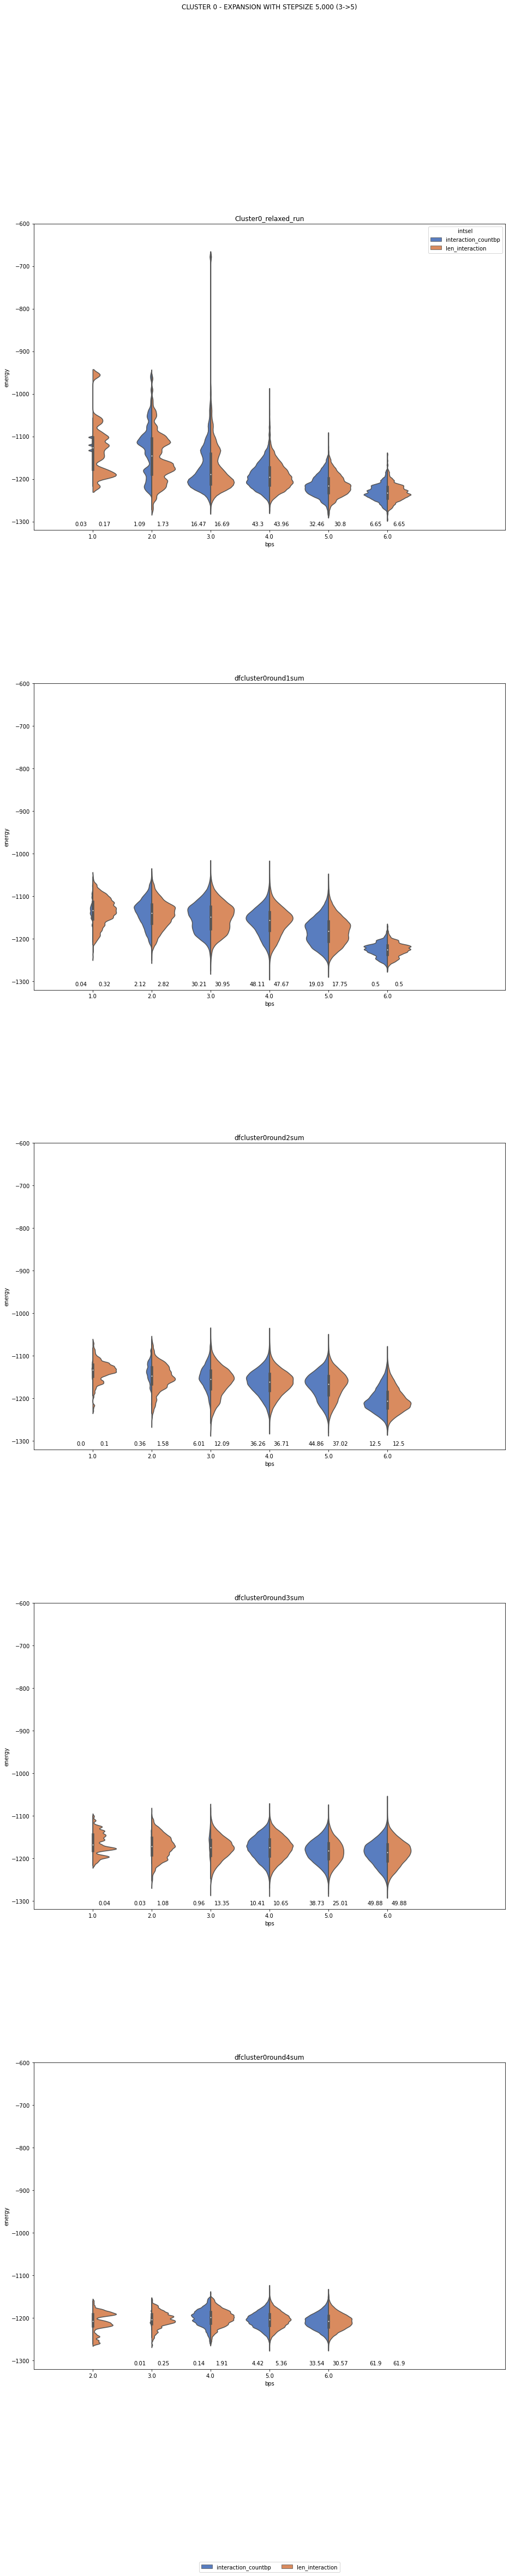

<Figure size 432x288 with 0 Axes>

In [31]:
print('CLUSTER 0 - EXPANSION WITH STEPSIZE 5,000')
print('start structure (3) --> contraint (5)')
majortitle=str('CLUSTER 0 - EXPANSION WITH STEPSIZE 5,000 (3->5)')

fig, ax = plt.subplots(nrows=5,figsize=[15,70])#,figsize=[80,60]
fig.subplots_adjust(hspace=0.5, wspace=0.2,top=0.9, left=0.1, right=0.9, bottom=0.12 )
xlim=(-1, 7.0)
ylim=(-1320,-600)
fig.suptitle(majortitle)
#ax.set_autoscale_on(False)

###RELAXED RUN
#prepare the dataframes
dfcluster0_relax.reset_index(inplace=True, drop=True)
new1_df = pd.DataFrame([dfcluster0_relax.energy_value, dfcluster0_relax.interaction_countbp]).transpose()
new1_df.columns = ['energy', 'bps']
new1_df['intsel'] = xval[0]

new2_df = pd.DataFrame([dfcluster0_relax.energy_value, dfcluster0_relax.len_interaction]).transpose()
new2_df.columns = ['energy', 'bps']
new2_df['intsel'] = xval[1]

newframes = [new1_df, new2_df]
new_df = pd.concat(newframes,ignore_index=True)
#new_df.astype({"bps": int})
print(new_df)

values1=pd.DataFrame(new1_df.bps.value_counts().sort_values().reset_index())
values1.columns = ['bpsint', 'nr']
values1['percent'] = (values1.nr /values1.nr.sum())*100
print(values1)

values2=pd.DataFrame(new2_df.bps.value_counts().sort_values().reset_index())
values2.columns = ['bpsint', 'nr']
values2['percent'] = (values2.nr /values2.nr.sum())*100
print(values2)
axname = str('ax'+str(n)) 
#Scale the violin width by the number of observations in each bin (scale=count):
axname = sns.violinplot(x="bps", y="energy", hue="intsel", data=new_df,
                        palette="muted", split=True, scale="count", ax=ax[0],
                        bw=0.1)
axname.set(xlim=xlim, ylim=ylim)
#ax.get_legend().remove()
#axname.set_xlim([-1.0, 7.0])
#axname.set_ylim([-1320,-600])

#plot the percentages of each interaction length
for index, row in values1.iterrows():
    axname.text(row.bpsint-1.2, -1310, round(row.percent,2), color='black', ha="center")

for index, row in values2.iterrows():
    axname.text(row.bpsint-0.8, -1310, round(row.percent,2), color='black', ha="center")

axname.title.set_text('Cluster0_relaxed_run')



##expansion steps

for n, df in enumerate(fclust_run):
    print(n)
    print(subplotsname[n])
    print(len(df))
    print(type(df))
    #prepare the dataframes
    df.reset_index(inplace=True, drop=True)
    new1_df = pd.DataFrame([df.energy_value, df.interaction_countbp]).transpose()
    new1_df.columns = ['energy', 'bps']
    new1_df['intsel'] = xval[0]
    new1_df["bps"] = pd.to_numeric(new1_df["bps"])

    new2_df = pd.DataFrame([df.energy_value, df.len_interaction]).transpose()
    new2_df.columns = ['energy', 'bps']
    new2_df['intsel'] = xval[1]
    new2_df["bps"] = pd.to_numeric(new2_df["bps"])
    
    newframes = [new1_df, new2_df]
    new_df = pd.concat(newframes,ignore_index=True)
    #new_df.astype({"bps": int})
    print(new_df)
    
    values1=pd.DataFrame(new1_df.bps.value_counts().sort_values().reset_index())
    values1.columns = ['bpsint', 'nr']
    values1['percent'] = (values1.nr /values1.nr.sum())*100
    print(values1)
    
    values2=pd.DataFrame(new2_df.bps.value_counts().sort_values().reset_index())
    values2.columns = ['bpsint', 'nr']
    values2['percent'] = (values2.nr /values2.nr.sum())*100
    print(values2)
    
    #Scale the violin width by the number of observations in each bin (scale=count):
    axname = str('ax'+str(n+1))  
    axpos=n+1
    axname = sns.violinplot(x="bps", y="energy", hue="intsel", data=new_df,
                            palette="muted", split=True, scale="count",  ax=ax[axpos],
                            bw=0.1)

    axname.get_legend().remove()
    axname.autoscale(enable=False) 
    axname.set(xlim=xlim, ylim=ylim)
    
    #plot the percentages of each interaction length
    for index, row in values1.iterrows():
        axname.text(row.bpsint-1.2, -1310, round(row.percent,2), color='black', ha="center")
        
    for index, row in values2.iterrows():
        axname.text(row.bpsint-0.8, -1310, round(row.percent,2), color='black', ha="center")
    
    ''' # dont need it for the run plots
    current_energy= framecluster0_long00interaction[n]['energy_value'].iloc[0]
    current_bp=(framecluster0_long00interaction[n]['len_interaction'].iloc[0])-1
    
    print (current_energy, current_bp+1)
    
    axname.text(current_bp,current_energy,"X", 
                color='darkred', ha="center",fontweight= "black",fontsize = 'xx-large')
    '''
    axname.title.set_text(subplotsname[n])

ax.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -2.12), ncol=3)

#fig.tight_layout()
#plt.xlim([-1.0, 7.0])
plt.setp(ax, xlim=(-1, 7.0), ylim=(-1320,-600))
plt.show()
plt.savefig('CopStems_cluster0_step5000.svg')


In [32]:
#clusterII
clust=str(1)
filename = list()
fclust_seed=list()
fclust_pdb=list()
fclust_run=list()
fclust_sumintperpdb=list()
fclust_sumintperrun=list()
stepsize="expand_long00"
subplotsname= list()
controllist_sumintperpdb=list()
controllist_sumintperrun=list()
controllist_seed=list()
controllist_pdb=list()
controllist_run=list()

for runs in range (4): # could be also lower/higher - if for one is no expansion possible
    run=str(runs+1)
    dfname1_sum=str("dfcluster"+clust+"round"+run+"sum")        
    subplotsname.append(dfname1_sum)
   
    for n in range(10): #10 different pdbs as starting points
        n=str(n+1)
        filename2=str("5000/cluster"+clust+"/"+run+"/"+n+"/CopStemsc"+clust+"_"+stepsize+"_"+run+".interaction-csv")
        dfname2=str("dfcluster"+clust+"round"+run+"nr"+n+"_interaction")

        try:
            globals()[dfname2]= pd.read_csv(filename2, sep="\t")
            fclust_sumintperpdb.append(globals()[dfname2])
            controllist_sumintperpdb.append(filename2)
        except:
            print("Probably there were no further expansion possible - please check")
            print(filename2) 
            pass
        
        for seed in range (10): #10 different seeds per pdb
            seed= str(seed+1)
            filename1=str("5000/cluster"+clust+"/"+run+"/"+n+"/CopStemsc"+clust+"_"+stepsize+"_"+run+"_"+seed+".csv")
            dfname1=str("dfcluster"+clust+"round"+run+"nr"+seed+"_long00")

            try:
                globals()[dfname1]= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,3)])
                fclust_seed.append(globals()[dfname1])
                controllist_seed.append(filename1)
            except:
                print("Probably there were no further expansion possible - please check")
                print(filename1)
                pass
 
        try:
            df_seed= pd.concat(fclust_seed) #concat 10 seeds from one starting pdb
            fclust_seed.clear()
            fclust_pdb.append(df_seed) # collect them
            '''
            print("controllist_seed")
            for item in controllist_seed:
                print (item)
            '''
            controllist_pdb.append(n)
            controllist_pdb.extend(controllist_seed)
            controllist_seed.clear()

        except:
            pass
        
    try:
        df_pdb = pd.concat(fclust_pdb) # every seed (10) from the 10 starting pdbs together
        fclust_run.append(df_pdb)
        fclust_pdb.clear() # dont't clear it - if I want to plot them seperate!
        '''
        print("controllist_pdb")
        for item in controllist_pdb:
            print (item)
        '''
        controllist_run.append(runs)
        controllist_run.extend(controllist_pdb)
        controllist_pdb.clear()

        dfclust_sumintperpdb = pd.concat(fclust_sumintperpdb)
        fclust_sumintperpdb.clear() # dont't clear it - if I want to plot them seperate!
        fclust_sumintperrun.append(dfclust_sumintperpdb) #as I use them seperate append is enough
        '''
        print("controllist sumintperpdb")
        for item in controllist_sumintperpdb:
            print(item)
        '''
        controllist_sumintperrun.append(runs)
        controllist_sumintperrun.extend(controllist_sumintperpdb)
        controllist_sumintperpdb.clear()

    except:
        pass
'''
print("controllist_sumintperrun")    
for item in controllist_sumintperrun:
    print(item)

print("controllist_run")    
for item in controllist_run:
    print(item)
'''
print(len(fclust_sumintperrun))
print(len(fclust_run))
print(len(fclust_sumintperpdb))
print(len(fclust_pdb))

Probably there were no further expansion possible - please check
5000/cluster1/1/1/CopStemsc1_expand_long00_1.interaction-csv
Probably there were no further expansion possible - please check
5000/cluster1/1/1/CopStemsc1_expand_long00_1_1.csv
Probably there were no further expansion possible - please check
5000/cluster1/1/1/CopStemsc1_expand_long00_1_2.csv
Probably there were no further expansion possible - please check
5000/cluster1/1/1/CopStemsc1_expand_long00_1_3.csv
Probably there were no further expansion possible - please check
5000/cluster1/1/1/CopStemsc1_expand_long00_1_4.csv
Probably there were no further expansion possible - please check
5000/cluster1/1/1/CopStemsc1_expand_long00_1_5.csv
Probably there were no further expansion possible - please check
5000/cluster1/1/1/CopStemsc1_expand_long00_1_6.csv
Probably there were no further expansion possible - please check
5000/cluster1/1/1/CopStemsc1_expand_long00_1_7.csv
Probably there were no further expansion possible - please che

Probably there were no further expansion possible - please check
5000/cluster1/3/6/CopStemsc1_expand_long00_3.interaction-csv
Probably there were no further expansion possible - please check
5000/cluster1/3/6/CopStemsc1_expand_long00_3_1.csv
Probably there were no further expansion possible - please check
5000/cluster1/3/6/CopStemsc1_expand_long00_3_2.csv
Probably there were no further expansion possible - please check
5000/cluster1/3/6/CopStemsc1_expand_long00_3_3.csv
Probably there were no further expansion possible - please check
5000/cluster1/3/6/CopStemsc1_expand_long00_3_4.csv
Probably there were no further expansion possible - please check
5000/cluster1/3/6/CopStemsc1_expand_long00_3_5.csv
Probably there were no further expansion possible - please check
5000/cluster1/3/6/CopStemsc1_expand_long00_3_6.csv
Probably there were no further expansion possible - please check
5000/cluster1/3/6/CopStemsc1_expand_long00_3_7.csv
Probably there were no further expansion possible - please che

Probably there were no further expansion possible - please check
5000/cluster1/4/5/CopStemsc1_expand_long00_4.interaction-csv
Probably there were no further expansion possible - please check
5000/cluster1/4/5/CopStemsc1_expand_long00_4_1.csv
Probably there were no further expansion possible - please check
5000/cluster1/4/5/CopStemsc1_expand_long00_4_2.csv
Probably there were no further expansion possible - please check
5000/cluster1/4/5/CopStemsc1_expand_long00_4_3.csv
Probably there were no further expansion possible - please check
5000/cluster1/4/5/CopStemsc1_expand_long00_4_4.csv
Probably there were no further expansion possible - please check
5000/cluster1/4/5/CopStemsc1_expand_long00_4_5.csv
Probably there were no further expansion possible - please check
5000/cluster1/4/5/CopStemsc1_expand_long00_4_6.csv
Probably there were no further expansion possible - please check
5000/cluster1/4/5/CopStemsc1_expand_long00_4_7.csv
Probably there were no further expansion possible - please che

In [33]:
filename = list()
fclust_seed=list()
fclust_pdb=list()
fclust_run=list()
fclust_sumintperpdb=list()
fclust_sumintperrun=list()
stepsize="expand"
subplotsname= list()
controllist_sumintperpdb=list()
controllist_sumintperrun=list()
controllist_seed=list()
controllist_pdb=list()
controllist_run=list()

for runs in range (4): # could be also lower/higher - if for one is no expansion possible
    run=str(runs+1)
    dfname1_sum=str("dfcluster0round"+run+"sum")        
    subplotsname.append(dfname1_sum)
   
    for n in range(10): #10 different pdbs as starting points
        n=str(n+1)
        filename2=str("10-000/cluster0/"+run+"/"+n+"/CopStemsc0_"+stepsize+"_"+run+".interaction-csv")
        dfname2=str("dfcluster0round"+run+"nr"+n+"_interaction")

        try:
            globals()[dfname2]= pd.read_csv(filename2, sep="\t")
            fclust_sumintperpdb.append(globals()[dfname2])
            controllist_sumintperpdb.append(filename2)
        except:
            print("Probably there were no further expansion possible - please check")
            print(filename2) 
            pass
        
        for seed in range (10): #10 different seeds per pdb
            seed= str(seed+1)
            filename1=str("10-000/cluster0/"+run+"/"+n+"/CopStemsc0_"+stepsize+"_"+run+"_"+seed+".csv")
            dfname1=str("dfcluster0round"+run+"nr"+seed+"_expand")

            try:
                globals()[dfname1]= pd.read_csv(filename1, sep="\t",skiprows=[i for i in range(1,3)])
                fclust_seed.append(globals()[dfname1])
                controllist_seed.append(filename1)
            except:
                #print("Probably there were no further expansion possible - please check")
                #print(filename1)
                pass
 
        try:
            df_seed= pd.concat(fclust_seed) #concat 10 seeds from one starting pdb
            fclust_seed.clear()
            fclust_pdb.append(df_seed) # collect them
            '''
            print("controllist_seed")
            for item in controllist_seed:
                print (item)
            '''
            controllist_pdb.append(n)
            controllist_pdb.extend(controllist_seed)
            controllist_seed.clear()

        except:
            pass
        
    try:
        df_pdb = pd.concat(fclust_pdb) # every seed (10) from the 10 starting pdbs together
        fclust_run.append(df_pdb)
        fclust_pdb.clear() # dont't clear it - if I want to plot them seperate!
        '''
        print("controllist_pdb")
        for item in controllist_pdb:
            print (item)
        '''
        controllist_run.append(runs)
        controllist_run.extend(controllist_pdb)
        controllist_pdb.clear()

        dfclust_sumintperpdb = pd.concat(fclust_sumintperpdb)
        fclust_sumintperpdb.clear() # dont't clear it - if I want to plot them seperate!
        fclust_sumintperrun.append(dfclust_sumintperpdb) #as I use them seperate append is enough
        '''
        print("controllist sumintperpdb")
        for item in controllist_sumintperpdb:
            print(item)
        '''
        controllist_sumintperrun.append(runs)
        controllist_sumintperrun.extend(controllist_sumintperpdb)
        controllist_sumintperpdb.clear()

    except:
        pass

print("controllist_sumintperrun")    
for item in controllist_sumintperrun:
    print(item)

print("controllist_run")    
for item in controllist_run:
    print(item)

print(len(fclust_sumintperrun))
print(len(fclust_run))
print(len(fclust_sumintperpdb))
print(len(fclust_pdb))

Probably there were no further expansion possible - please check
10-000/cluster0/4/1/CopStemsc0_expand_4.interaction-csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/2/CopStemsc0_expand_4.interaction-csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/4/CopStemsc0_expand_4.interaction-csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/5/CopStemsc0_expand_4.interaction-csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/6/CopStemsc0_expand_4.interaction-csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/7/CopStemsc0_expand_4.interaction-csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/8/CopStemsc0_expand_4.interaction-csv
Probably there were no further expansion possible - please check
10-000/cluster0/4/9/CopStemsc0_expand_4.interaction-csv
controllist_sumintperrun
0
10-00

CLUSTER 0 - EXPANSION WITH STEPSIZE 5,000
start structure (3) --> contraint (5)
            energy  bps               intsel
0      -678.118198  3.0  interaction_countbp
1      -998.854130  3.0  interaction_countbp
2     -1034.483868  3.0  interaction_countbp
3     -1039.746681  3.0  interaction_countbp
4     -1040.894023  3.0  interaction_countbp
...            ...  ...                  ...
20015 -1215.069158  5.0      len_interaction
20016 -1212.363038  3.0      len_interaction
20017 -1211.712045  4.0      len_interaction
20018 -1209.111094  5.0      len_interaction
20019 -1210.972969  4.0      len_interaction

[20020 rows x 3 columns]
   bpsint    nr    percent
0     1.0     3   0.029970
1     2.0   109   1.088911
2     6.0   666   6.653347
3     3.0  1649  16.473526
4     5.0  3249  32.457542
5     4.0  4334  43.296703
   bpsint    nr    percent
0     1.0    17   0.169830
1     2.0   173   1.728272
2     6.0   666   6.653347
3     3.0  1671  16.693307
4     5.0  3083  30.799201
5  

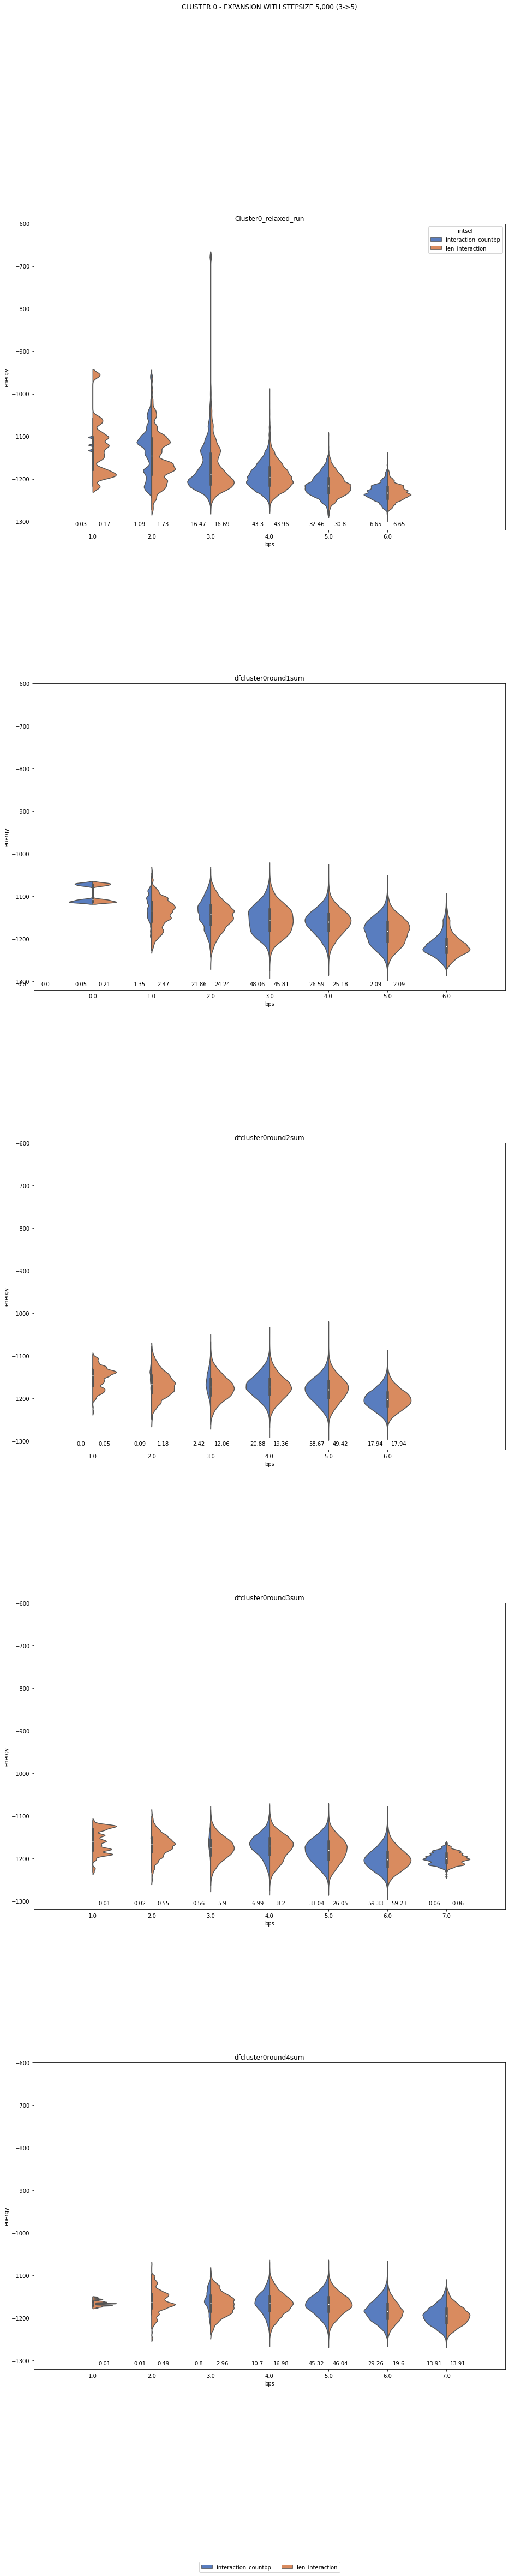

<Figure size 432x288 with 0 Axes>

In [34]:
print('CLUSTER 0 - EXPANSION WITH STEPSIZE 5,000')
print('start structure (3) --> contraint (5)')
majortitle=str('CLUSTER 0 - EXPANSION WITH STEPSIZE 5,000 (3->5)')

fig, ax = plt.subplots(nrows=4,figsize=[15,70])#,figsize=[80,60]
fig.subplots_adjust(hspace=0.5, wspace=0.2,top=0.9, left=0.1, right=0.9, bottom=0.12 )
xlim=(-1, 7.0)
ylim=(-1320,-600)
fig.suptitle(majortitle)
#ax.set_autoscale_on(False)

##expansion steps

for n, df in enumerate(fclust_run):
    print(n)
    print(subplotsname[n])
    print(len(df))
    print(type(df))
    #prepare the dataframes
    df.reset_index(inplace=True, drop=True)
    new1_df = pd.DataFrame([df.energy_value, df.interaction_countbp]).transpose()
    new1_df.columns = ['energy', 'bps']
    new1_df['intsel'] = xval[0]
    new1_df["bps"] = pd.to_numeric(new1_df["bps"])

    new2_df = pd.DataFrame([df.energy_value, df.len_interaction]).transpose()
    new2_df.columns = ['energy', 'bps']
    new2_df['intsel'] = xval[1]
    new2_df["bps"] = pd.to_numeric(new2_df["bps"])
    
    newframes = [new1_df, new2_df]
    new_df = pd.concat(newframes,ignore_index=True)
    #new_df.astype({"bps": int})
    print(new_df)
    
    values1=pd.DataFrame(new1_df.bps.value_counts().sort_values().reset_index())
    values1.columns = ['bpsint', 'nr']
    values1['percent'] = (values1.nr /values1.nr.sum())*100
    print(values1)
    
    values2=pd.DataFrame(new2_df.bps.value_counts().sort_values().reset_index())
    values2.columns = ['bpsint', 'nr']
    values2['percent'] = (values2.nr /values2.nr.sum())*100
    print(values2)
    
    #Scale the violin width by the number of observations in each bin (scale=count):
    axname = str('ax'+str(n+1))  
    axpos=n
    axname = sns.violinplot(x="bps", y="energy", hue="intsel", data=new_df,
                            palette="muted", split=True, scale="count",  ax=ax[axpos],
                            bw=0.1)

    axname.get_legend().remove()
    axname.autoscale(enable=False) 
    axname.set(xlim=xlim, ylim=ylim)
    
    #plot the percentages of each interaction length
    for index, row in values1.iterrows():
        axname.text(row.bpsint-1.2, -1310, round(row.percent,2), color='black', ha="center")
        
    for index, row in values2.iterrows():
        axname.text(row.bpsint-0.8, -1310, round(row.percent,2), color='black', ha="center")
    
    ''' # dont need it for the run plots
    current_energy= framecluster0_long00interaction[n]['energy_value'].iloc[0]
    current_bp=(framecluster0_long00interaction[n]['len_interaction'].iloc[0])-1
    
    print (current_energy, current_bp+1)
    
    axname.text(current_bp,current_energy,"X", 
                color='darkred', ha="center",fontweight= "black",fontsize = 'xx-large')
    '''
    axname.title.set_text(subplotsname[n])

ax.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -2.12), ncol=3)

#fig.tight_layout()
#plt.xlim([-1.0, 7.0])
plt.setp(ax, xlim=(-1, 7.0), ylim=(-1320,-600))
plt.show()
plt.savefig('CopStems_cluster0_step5000.svg')


Probably there were no further expansion possible - please check
100-000/cluster0/1/1/CopStemsc0_expand_long03_1.interaction-csv
Probably there were no further expansion possible - please check
100-000/cluster0/1/2/CopStemsc0_expand_long03_1.interaction-csv
Probably there were no further expansion possible - please check
100-000/cluster0/1/3/CopStemsc0_expand_long03_1.interaction-csv
Probably there were no further expansion possible - please check
100-000/cluster0/1/4/CopStemsc0_expand_long03_1.interaction-csv
Probably there were no further expansion possible - please check
100-000/cluster0/1/5/CopStemsc0_expand_long03_1.interaction-csv
Probably there were no further expansion possible - please check
100-000/cluster0/1/6/CopStemsc0_expand_long03_1.interaction-csv
Probably there were no further expansion possible - please check
100-000/cluster0/1/7/CopStemsc0_expand_long03_1.interaction-csv
Probably there were no further expansion possible - please check
100-000/cluster0/1/8/CopStemsc0_